In [1]:
import numpy as np
from integrator import evolve
from physics.dynamics import acceleration
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

In [2]:
def SHO(y, t):
    r = y[0:3]
    v = y[3:6]
    drdt = v
    dvdt = -2**2 * r
    return np.concatenate((drdt, dvdt))

In [3]:
r0 = [1, 0, 0]
v0 = [0, 1, 0]
y0 = np.array([r0, v0])

In [4]:
T = 1000
time_step = 0.01
time = np.arange(0, T, time_step)

In [5]:
#Actual soltions

x_exact = r0[0] * np.cos(2 * time) + (v0[0] / 2) * np.sin(2 * time)
y_exact = r0[1] * np.cos(2 * time) + (v0[1] / 2) * np.sin(2 * time)
z_exact = r0[2] * np.cos(2 * time) + (v0[2] / 2) * np.sin(2 * time)

In [6]:
# My Integral solutions

r_ME, v_ME = evolve(r0, v0, time, EoM=SHO, method='RK4')

In [15]:
y0 = np.concatenate((r0, v0))
sol = odeint(SHO, y0, time)
r_scipy = sol[:, :3].T
v_scipy = sol[:, 3:].T

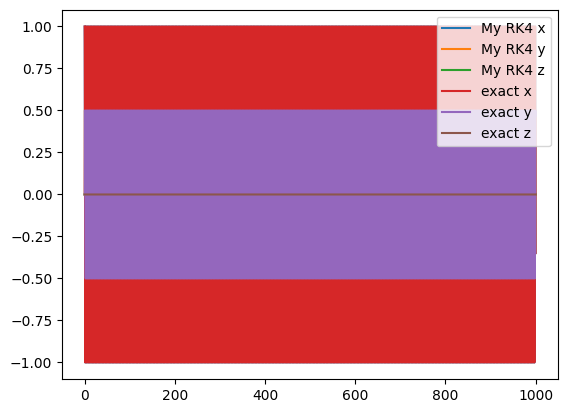

In [8]:
plt.plot(time, r_ME[0], label='My RK4 x')
plt.plot(time, r_ME[1], label='My RK4 y')
plt.plot(time, r_ME[2], label='My RK4 z')

plt.plot(time, x_exact, label='exact x')
plt.plot(time, y_exact, label='exact y')
plt.plot(time, z_exact, label='exact z')

#plt.plot(time, r_scipy[0], '--', label='SciPy x')
#plt.plot(time, r_scipy[1], '--', label='SciPy y')
#plt.plot(time, r_scipy[2], '--', label='SciPy z')

plt.legend()
plt.show()

0.6355708245801308


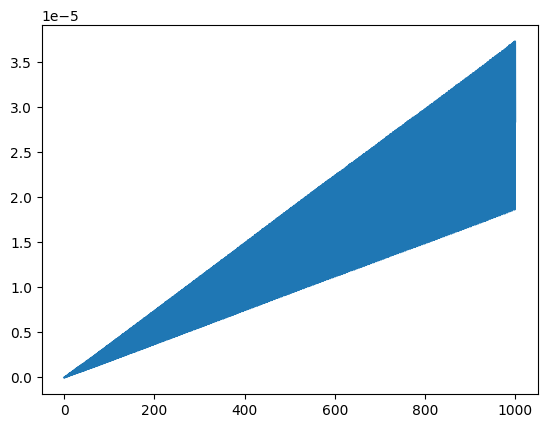

In [16]:
error = np.linalg.norm(r_scipy - np.array([x_exact, y_exact, z_exact]), axis=0)
std = np.std(error)
mean = np.mean(error)
metric = std/mean
print(metric)
plt.plot(time, error)
plt.show()

In [17]:
step_sizes = np.logspace(-3, -1, 5)
metrics = []
for step_size in step_sizes:
    time = np.arange(0, T, step_size)
    r_ME, v_ME = evolve(r0, v0, time, EoM=SHO, method='RK4')
    x_exact = r0[0] * np.cos(2 * time) + (v0[0] / 2) * np.sin(2 * time)
    y_exact = r0[1] * np.cos(2 * time) + (v0[1] / 2) * np.sin(2 * time)
    z_exact = r0[2] * np.cos(2 * time) + (v0[2] / 2) * np.sin(2 * time)
    error = np.linalg.norm(r_ME - np.array([x_exact, y_exact, z_exact]), axis=0)
    std = np.std(error)
    mean = np.mean(error)
    metric = std/mean
    metrics.append(metric)

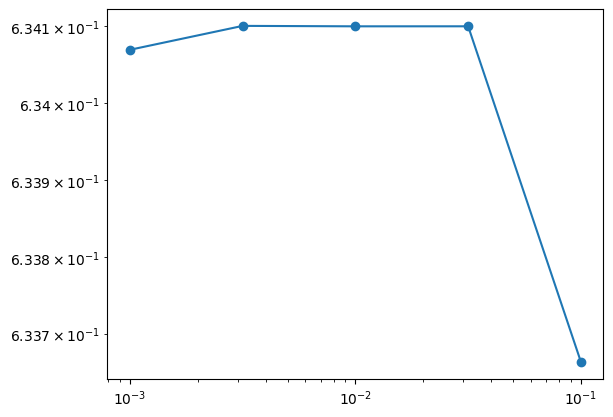

In [19]:
plt.plot(step_sizes, metrics, marker='o')
plt.xscale('log')
plt.yscale('log')

dt=1.000e-03 N=1000000 mean=1.029e-10 std=6.522e-11 rms=1.218e-10 max=2.668e-10
dt=3.162e-03 N=316228 mean=1.028e-08 std=6.519e-09 rms=1.217e-08 max=2.666e-08
dt=1.000e-02 N=100000 mean=1.028e-06 std=6.519e-07 rms=1.217e-06 max=2.666e-06
dt=3.162e-02 N=31623 mean=1.028e-04 std=6.519e-05 rms=1.217e-04 max=2.666e-04
dt=1.000e-01 N=10000 mean=1.026e-02 std=6.501e-03 rms=1.215e-02 max=2.659e-02


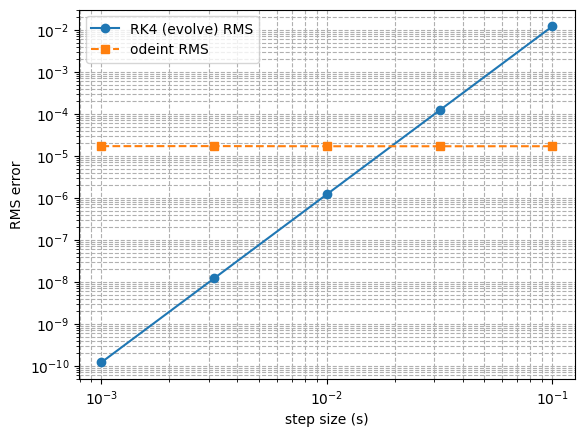

In [20]:
# ...existing code...
step_sizes = np.logspace(-3, -1, 5)
rms_errors = []
odeint_rms = []
for step_size in step_sizes:
    time = np.arange(0, T, step_size)
    # my integrator
    r_ME, v_ME = evolve(r0, v0, time, EoM=SHO, method='RK4')
    x_exact = r0[0] * np.cos(2 * time) + (v0[0] / 2) * np.sin(2 * time)
    y_exact = r0[1] * np.cos(2 * time) + (v0[1] / 2) * np.sin(2 * time)
    z_exact = r0[2] * np.cos(2 * time) + (v0[2] / 2) * np.sin(2 * time)
    error = np.linalg.norm(r_ME - np.array([x_exact, y_exact, z_exact]), axis=0)
    mean_err = np.mean(error)
    std_err = np.std(error)
    rms = np.sqrt(np.mean(error**2))
    mx = np.max(error)
    print(f"dt={step_size:.3e} N={len(time):4d} mean={mean_err:.3e} std={std_err:.3e} rms={rms:.3e} max={mx:.3e}")
    rms_errors.append(rms)

    # reference with odeint
    y0 = np.concatenate((r0, v0))
    sol = odeint(SHO, y0, time)
    r_ref = sol[:, :3].T
    error_ref = np.linalg.norm(r_ref - np.array([x_exact, y_exact, z_exact]), axis=0)
    odeint_rms.append(np.sqrt(np.mean(error_ref**2)))

plt.loglog(step_sizes, rms_errors, 'o-', label='RK4 (evolve) RMS')
plt.loglog(step_sizes, odeint_rms, 's--', label='odeint RMS')
plt.xlabel('step size (s)')
plt.ylabel('RMS error')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()
# ...existing code...